<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe6_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de la selección

Para los problemas de selección, se nos pide encontrar el k-ésimo menor número en un arreglo a este número se le llama estadístico de orden "k". Este incluye los casos de encontrar el mínimo, máximo, y la mediana.

**Entrada**: Conjunto de $n$ números diferentes $A$  más un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$.

El elemento $x$ se conoce como **estadístico de orden $i$-ésimo** para el conjunto $A$.

Este tipo de problemas son especialmente utiles en el área de la estadistica

# 2. Selection

## 2.1 Descripción del Algoritmo

Este algoritmo se utiliza para obtener los estadístico de orden "k", que es el k-ésimo valor más pequeño de una muestra (en este caso el arreglo). Y realiza los siguientes pasos: 


1. Se define el valor "K" a buscar

2. Después se pasa a la función pivotSelect que hace lo siguiente: 

 2.1 Divide el conjunto de $n$ elementos en $\lceil n/5 \rceil$ grupos de 5 elementos cada uno (el último grupo queda con menos elementos)

 2.2 Encuentra la mediana de cada grupo aplicando el algoritmo 
 InsertionSort para ordenarlos.

 2.3 Se aplica pivotSelect recursivamente para encontrar la mediana $m$ de las $\lceil n/5 \rceil$ medianas identificadas el paso previo. 

 2.4 Luego, $m$ será el pivote usado por el método partition.

3. Luego con la función partition se divide el arreglo con respecto al pivote, dejando a la izquierda los números menores al pivote y la derecha los números mayores al pivote (con esto, nos aseguramos que el número que quedo en el pivote está si o si en su posición correcta ordenada de forma creciente).

4. En este punto tenemos 3 casos: 

 4.1 Que la posición del pivote sea el valor k que estamos buscando: en este ya hemos encontrado el k-ésimo elemento, por lo que retornamos el valor que se encuentra en dicha posición.
 
 4.2 Que la posición del pivote sea mayor que el valor k: en este caso debemos quedarnos con la parte izquieda del arreglo y descartar la derecha, puesto que nos aseguramos que en la parte derecha al pivote están los elementos mayores, no existe la posibilidad que nuestro k se encuentre en dicho rango.

 4.3 Que la posición del pivote sea menor que el valor k: en este caso nos quedamos con la parte derecha del arreglo, que es el unico rango donde se puede encontrar nuestro valor k.

5. En caso que se de el punto 4.1, ya habremos encontrado nuestro número k por lo que simplemente se retorna. En caso que nos encontremos con los puntos 4.2 o 4.3, lo que hará el algoritmo será llamar nuevamente la función "Select" aplicando la recursividad, pero esta vez con el rango en el cual se puede encontrar el valor k hasta que finalmente se de el caso 4.1 y se retorne.





##2.2 Código

###A continuación se mostrará la implementación del RadixSort:


In [126]:
contador = 0

def Select(arr, l, r, k, verbose = False):

    if (k > 0 and k <= r - l + 1): #se verifica que k este en el rango
         
        n = r - l + 1 #numero de elementos en el arreglo
 
        pivot = pivotSelection(arr,l,n) #se obtiene el elemento que será nuestro pivote

        pos = partition(arr, l, r, pivot) #se divide el arreglo mediante un pivote
                                          #con numeros menores a la izquierda y mayores a la derecha

        # Si la posicion es igual al valor k buscado
        if (pos - l == k - 1):
            return arr[pos]
        if (pos - l > k - 1): # Si es mayor, nos quedamos con la izquierda
            return Select(arr, l, pos - 1, k, verbose)
 
        # En caso que sea menor, nos quedamos con la derecha
        return Select(arr, pos + 1, r, k - pos + l - 1,verbose)
        
    return print("K fuera de rango")
 
def swap(arr, a, b):
    temp = arr[a]
    arr[a] = arr[b]
    arr[b] = temp

#divide el arreglo respecto a un pivote, dejando los numeros menores a la izquierda
#del pivote, y los numeros mayores a la derecha del pivote
def partition(arr, l, r, x):
    for i in range(l, r):
        if arr[i] == x:
            swap(arr, r, i)
            break
    x = arr[r]
    i = l
    for j in range(l, r):
        if (arr[j] <= x):
            swap(arr, i, j)
            i += 1
    swap(arr, i, r)
    return i
 
# Con esta funcion se ordena y retorna la mediana de un conjunto de elementos
def mediana(arr, l, n):
    auxarr = []
    for i in range(l, l + n):
        auxarr.append(arr[i])        
    insertionSort(auxarr)
    return auxarr[n // 2]

def pivotSelection(arr, l, n):
        global contador
        median = []
        i = 0
        #Se divide el arreglo en grupos de 5 elementos, se calcula la mediana 
        #y se inserta en un arreglo que contendra todas las medianas
        while (i < n // 5):
            median.append(mediana(arr, l + i * 5, 5))
            i += 1
 
        # Para el ultimo grupo en caso que tenga menos de 5 elementos
        if (i * 5 < n):
            median.append(mediana(arr, l + i * 5, n % 5))
            i += 1
 
        # Mediante una llamada recursiva, se obtiene la mediana de las medianas
        if i == 1:
            pivot = median[i - 1]
        else:
            pivot = Select(median, 0,i - 1, i // 2,verbose = False)
        
        return pivot;
def insertionSort(arr):
    global contador
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
                contador+=1
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key


# Ejemplo
arr = [ 10, 4, 5, 8, 6, 11, 26 ]
n = len(arr)
print("Ingrese el k-ésimo número: ")
k = int(input())
print("El k-ésimo elemento menor es ", end = "")
print(Select(arr, 0, n - 1, k, verbose = False))

Ingrese el k-ésimo número: 
7
El k-ésimo elemento menor es 26


# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

  *El algoritmo **Select** tiene un **tiempo de ejecución de** $O(n)$* 

## Prueba del teorema

Dentro del algoritmo encontramos los siguientes pasos:

1. En pivotSelection tenemos un tiempo final de ejecución de $O(n/5)$, puesto que sub dividimos el problema en 5 casos iguales.

2. La función partition tiene un tiempo de ejecución de $O(n)$ en todo caso, ya que debe recorrer de izquierda a derecha para ordenar los elementos con respecto al pivote.

3. Para la llamada recursiva tenemos un tiempo en el peor caso de $O(7n/10)$, esto viene ya que al seleccionar el pivote lo más central posible, se optimiza lo maximo posible para no hacer llamadas recursivas de más.

  $T(n) \leq T(\frac{n}{5})+T(\frac{7n}{10})+O(n)$ 

que por el Teorema Maestro nos da un tiempo de ejecución de $O(n)$

# 4. Correctitud 

### **Teorema (Correctitud Select).**

*El algoritmo **Select** retorna el k-ésimo menor elemento de un arreglo de entrada desordenado $[a_1',a_2',...,a_n']$

## Prueba del Teorema

Para probar el teorema lo haremos mediante la inducción matemática:

Caso Base ($n=1$): 

*Cuando tenemos que el tamaño del subarreglo N es 1, entonces k = 1 ; low  = high y el k-ésimo elemento es A[low] = A[high] *

Caso General ($n>1$): 

*Para cualquier caso, el k es un número dentro del rango del arreglo, si el pivote no es el k-ésimo elemento, el arreglo se dividira con respecto a un pivote, quedandose con la parte posible, minimizando la muestra en cada llamada recursiva hasta que llegar al caso base o que el pivote sea igual a el k-ésimo elemento buscado.*

**Correctitud**

Finalmente, por inducción matemática se puede demostrar que tanto para un caso base, como para un caso general el algoritmo cumple con su función, por tanto podemos decir que el algoritmo retorna de forma correcta el k-ésimo elemento menor dentro del arreglo

# 5. Experimentos

## 5.1. tiempo de ejecución

A continuación se muestra gráficamente una comparación de tiempo de ejecución entre:

* Select seleccionando el pivote manualmente

* Select seleccionando el pivote random

Los arreglos de entrada son desde tamaño 5 hasta 500, con números generados aleatoriamente haciendo un sampling entre 1 y 1000.

In [121]:
from random import shuffle

def _partition(arr, lo, hi, pivot):
    p = arr[pivot]
    arr[hi - 1], arr[pivot] = arr[pivot], arr[hi - 1]
    i = lo - 1
    for j in range(lo, hi):
        if arr[j] <= p:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    return i


def selectRandom(arr, lo, hi, spos):
    assert lo <= spos < hi
    shuffle(arr)  # shuffling is the randomization.
    while True:
        pos = _partition(arr, lo, hi, lo)
        if pos == spos:
            return arr[pos]
        elif pos < spos:
            lo = pos + 1
        else:
            hi = pos

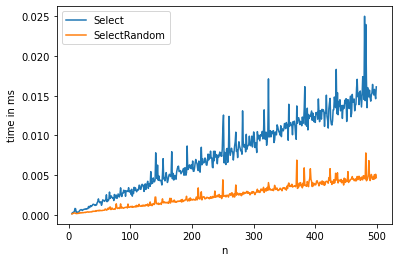

In [128]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
k = 3
x=[]; y=[]; y1=[]
verbose = False
for n in range(5, 500):
  a = random.sample(range(1, 1000), n)
  largo = len(a)
  t1 = repeat(setup="from __main__ import Select", stmt=f"Select({a}, {0},{largo - 1}, {k}, {verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import selectRandom", stmt=f"selectRandom({a}, {0},{largo - 1}, {k})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select","SelectRandom"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En la grafica podemos ver que, por un lado, ambos se comportan de manera lineal como dice el teorema, por otro lado vemos que seleccionando el pivote de forma aleatoria el algoritmo tiene un tiempo de ejecución notablemente menor, de esto puedo sacar 2 conclusiones. El primer caso que realmente al ser de forma aleatoria se obtiene un menor tiempo, o por otro lado al seleccionar de forma manual el pivote se debe hacer uso de variadas funciones externas, lo que puede hacer que el tiempo de ejecución aumente comparado al SelectRandom que lo realiza en un mismo paso. 

## 5.1. número de comparaciones

A continuación se muestra gráficamente una comparación entre el número de comparaciones de: 

* Mejor caso teorico

* Peor caso o promedio

Los arreglos de entrada son desde tamaño 5 hasta 500, con números generados aleatoriamente haciendo un sampling entre 1 y 1000.

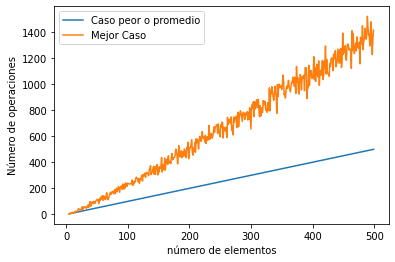

In [135]:
x=[n for n in range(5,500)]
y=[]; #caso Promedio
y1=[];
k = 3
for n in range(5,500):
  contador = 0
  a = random.sample(range(1, 1000), n)
  Select(a, 0, n - 1, k, verbose = False)
  y1.append(n)
  y.append(contador)

plt.plot(x,y1)
plt.plot(x,y)
plt.legend(["Caso peor o promedio","Mejor Caso teorico"])

plt.xlabel('número de elementos')
plt.ylabel('Número de operaciones')
plt.show()

### Análisis de resultados

En la grafica podemos ver que crece de manera constante la cantidad de comparaciones que realiza, mientras que en el mejor caso, teoricamente podria resolverse que luego de hacer el primer partition, nuestro pivote sea el número k a buscar, por lo que demora O(n) en realizarlo, mientras que el caso peor o promedio tiende a realizar más pasos puesto que es muy poco probable que en las primeras iteraciones se encuentre el elemento, por lo que sería O(n + constante)

